**Background on the policy context**: here, we're going to use two datasets to analyze the broader issue of which employers might be violating the rights of temporary guestworkers granted visas under the H-2A program. Here are some articles about potential exploitation of guestworkers by firms and inequality caused by minimal oversight:

- News media coverage of labor abuses of temporary guestworkers: https://www.buzzfeednews.com/article/kenbensinger/the-pushovers 
- GAO report on labor abuses of temporary guestworkers: https://www.gao.gov/products/gao-15-154

The following datasets are located in `pset4_inputdata` (need to unzip): 

- `jobs_clean`: a dataset of guestworker jobs posted by many employers, some of whom have been debarred (banned) from the program for labor abuses; others not debarred
- `debar`: a dataset of employers who committed violations of labor regulations meant to protect temporary guestworkers 

In [1]:
## helpful packages
import pandas as pd
import numpy as np
import random
import re
import os

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Reshaping data

`debar`: Employers temporarily banned from hiring workers (debar.csv)

In [2]:
# Getting filepath:
import os
dirname = os.getcwd()

In [3]:
## Getting debar:

# Getting file:
filename = dirname + "\pset4_inputdata\pset4_inputdata\debar.csv"

# Reading in data:
debar_0 = pd.read_csv(filename)

# Checking data:
debar_0.head()

,Name,"City, State",Violation,Start date,viol_num
0,Macky and Brad Farms,"Plains, TX",Impeding the Audit Process – Partial- Response,2/13/2015,viol1
1,Labatte Farms,"Froid, MT",Impeding the Audit Process – Non- Response,1/17/2016,viol1
2,"RB Farm Picking, Inc","Miami, FL",Failure to respond to audit (no response),10/26/2013,viol1
3,Abe- Nancy Froese,"Seminole, TX",Failure to respond to audit request,11/23/2017,viol1
4,Quentin Schell,"Towner, North Dakota",Non-payment of certification fee,7/22/2016,viol1


In [4]:
## your code here
debar_nrows = debar_0.shape[0]
unique_employers = len(pd.unique(debar_0["Name"]))

print("Number of rows: " + str(debar_nrows))
print("Number of unique employers: " + str(unique_employers))

Number of rows: 105
Number of unique employers: 94


<FONT COLOR = BLUE>

There are <strong> multiple rows for some employers. </strong> 
</FONT>

## Investigating duplicated rows

1. Creating a new column in `debar`--`is_repeated`-- that tells us whether an employer (`Name`) is repeated > 1 times

In [5]:
## Creating New Column:

# Name of companies with > 1 violations
repeated = (debar_0["Name"].value_counts() > 1).reset_index()

# Indicator in original dataset using list of repeated names
debar_0["debar_is_repeated"] = debar_0["Name"].isin(list(repeated["index"][repeated["Name"] == True]))

# Printing sample
print("Printing rows where is_repeated is true: ")
debar_0[debar_0["debar_is_repeated"] == True]
print("Interpretation: \n Most companies are shown to have 2 violations and mostly are for failure to respond to the audit process, \n although there are a few other violations. \n Dove Creek & Old Tree Farms seems to have a duplicated row because of violation descriptions.")

#* Personal Check:
#* pd.unique(debar_0["debar_is_repeated"])

## Saving data:
mult_debar = debar_0[debar_0["debar_is_repeated"] == True].sort_values(["Name","viol_num"])
print("\n Head of mult_bar: ")
mult_debar.head()
print("\n Shape of mult_bar: " + str(mult_debar.shape))

Printing rows where is_repeated is true: 


,Name,"City, State",Violation,Start date,viol_num,debar_is_repeated
0,Macky and Brad Farms,"Plains, TX",Impeding the Audit Process – Partial- Response,2/13/2015,viol1,True
9,Autumn Hill Orchard,"Groton, MA",Impeding the Audit Process – Non- Response,7/6/2014,viol2,True
14,Macky and Brad Farms,"Plains, TX",Failure to respond to audit (no response),2/13/2015,viol2,True
23,SRT Farms,"Morton, TX",Failure to respond to audit (no response),11/16/2014,viol1,True
24,Dove Creek Farms,"Mount Vernon, TX",Failure to Respond to Audit Request,2/9/2018,viol1,True
26,Old Tree Farms/Verpaalen Custom Service,"Volga, SD",WHD Debarment,12/11/2014,viol1,True
37,Rollo Farm Labor Contractor,"Miami, FL",Impeding the Audit Process – Non- Response,8/23/2014,viol2,True
44,Rollo Farm Labor Contractor,"Miami, FL",Failure to respond to audit (no response),8/23/2014,viol1,True
48,F&W Farms,"Ingalls, KS",Impeding the Audit Process – Partial- Response,12/10/2014,viol1,True
49,Cisco Produce Inc.,"Cairo, GA",Impeding the Audit Process – Non- Response,12/10/2015,viol1,True


Interpretation: 
 Most companies are shown to have 2 violations and mostly are for failure to respond to the audit process, 
 although there are a few other violations. 
 Dove Creek & Old Tree Farms seems to have a duplicated row because of violation descriptions.

 Head of mult_bar: 


,Name,"City, State",Violation,Start date,viol_num,debar_is_repeated
95,Autumn Hill Orchard,"Groton, MA",Failure to respond to audit (no response),7/6/2014,viol1,True
9,Autumn Hill Orchard,"Groton, MA",Impeding the Audit Process – Non- Response,7/6/2014,viol2,True
49,Cisco Produce Inc.,"Cairo, GA",Impeding the Audit Process – Non- Response,12/10/2015,viol1,True
70,Cisco Produce Inc.,"Cairo, GA",Failure to respond to audit (no response),12/10/2014,viol2,True
24,Dove Creek Farms,"Mount Vernon, TX",Failure to Respond to Audit Request,2/9/2018,viol1,True



 Shape of mult_bar: (22, 6)


## Reshaping mult_debar to wide to begin filtering out duplicates

I want to separate out two cases:

- Cases where the repeat rows for one employer are due to duplicated data 
- Cases where the repeat rows for one employer represent repeated violations for different issues

Simple rule of:

- A row is a duplicate if, within an employer (defined by Name + City, State), the Start date for each row's violation is the same 

To begin to check this, reshaping `mult_debar` to a wide dataframe (`mult_debar_wide`) with the following columns, treating the `Name` and `City, State` as the index for the pivot:

- Name
- City, State
- start_date_viol1
- start_date_viol2

In [6]:
mult_debar_wide = pd.pivot(mult_debar, index = ["Name","City, State"], columns = "viol_num", values = "Start date").reset_index()
print("Head of wide date:")
mult_debar_wide.head()
print("Shape of wide date:" + str(mult_debar_wide.shape))

Head of wide date:


viol_num,Name,"City, State",viol1,viol2
0,Autumn Hill Orchard,"Groton, MA",7/6/2014,7/6/2014
1,Cisco Produce Inc.,"Cairo, GA",12/10/2015,12/10/2014
2,Dove Creek Farms,"Mount Vernon, TX",2/9/2018,2/9/2018
3,F&W Farms,"Ingalls, KS",12/10/2014,12/10/2014
4,Macky and Brad Farms,"Plains, TX",2/13/2015,2/13/2015


Shape of wide date:(11, 4)


## Filtering out duplicates from original debar data

A. Using `mult_debar_wide`, add a column `is_dup` that takes value of True for cases where start_date_viol1 == start_date_viol2 marking the row as a duplicate

B. Going back to the original long-format data we loaded at the beginning- `debar`
    - For employers where `is_dup == True` as indicated by your wide-format dataframe, only keep `violnum == viol1`
    - For all other employers (so is_dup == False and ones we didnt need to check duplicates for), keep all violnum
    - Remove the `is_repeated` column from the `debar` data

In [7]:
## Adding duplicate columns:
mult_debar_wide["is_dup"] = (mult_debar_wide["viol1"] == mult_debar_wide["viol2"])
mult_debar_wide

viol_num,Name,"City, State",viol1,viol2,is_dup
0,Autumn Hill Orchard,"Groton, MA",7/6/2014,7/6/2014,True
1,Cisco Produce Inc.,"Cairo, GA",12/10/2015,12/10/2014,False
2,Dove Creek Farms,"Mount Vernon, TX",2/9/2018,2/9/2018,True
3,F&W Farms,"Ingalls, KS",12/10/2014,12/10/2014,True
4,Macky and Brad Farms,"Plains, TX",2/13/2015,2/13/2015,True
5,Mark Duncan,"Roosevelt, UT",11/16/2014,11/16/2014,True
6,Old Tree Farms/Verpaalen Custom Service,"Volga, SD",12/11/2014,12/1/2014,False
7,Rollo Farm Labor Contractor,"Miami, FL",8/23/2014,8/23/2014,True
8,SRT Farms,"Morton, TX",11/16/2014,11/16/2014,True
9,Sharon Mathis,"Tifton, GA",11/16/2014,11/16/2014,True


In [8]:
# Keeping corrected data

# Concatenating final data:
debar_clean = pd.concat([
    # 1. Picking companies that are not repeated 
    debar_0[debar_0["debar_is_repeated"] == False],
     # 2. Picking companies that are repeated & violations are not duplicates
     debar_0[debar_0["Name"].isin(list(mult_debar_wide["Name"][mult_debar_wide["is_dup"] == False]))],
    # 3. Picking companies that are repeated & violations are duplicates
    debar_0[(debar_0["viol_num"] == "viol1") & 
                      (debar_0["Name"].isin(list(mult_debar_wide["Name"][(mult_debar_wide["is_dup"] == True)])))]])

# Dropping unecessarily column
debar_clean = debar_clean.drop(columns = "debar_is_repeated")

# Printing required info
print("Shape of debar_clean = " + str(debar_clean.shape))
print("Number of unique employers: " + str(len(pd.unique(debar_clean["Name"]))))

Shape of debar_clean = (97, 5)
Number of unique employers: 94


# Merging and regex 

##  Load data on job postings

The previous dataset contains a small subset of employers who faced temporary bans due to violations of H-2A program regulations

Since most of the bans have expired, we're going to see which of those employers posted new H-2A jobs in the first quarter of 2021 

Loading the `jobs_clean.csv`

In [9]:
# Getting file:
filename = dirname + "\pset4_inputdata\pset4_inputdata\jobs_clean.csv"

# Reading in data:
jobs_0 = pd.read_csv(filename)

# Checking data:
jobs_0.head()

,CASE_NUMBER,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_ADDRESS_1
0,H-300-20199-721302,"Fazio Farms Operating Company, LLC",Portland,OR,8433 NE 13th Ave
1,H-300-20231-773906,Charlie Sunderland,McMinnville,TN,982 Northcutts Cove Road
2,H-300-20231-774123,Michael Rudebusch,Livingston,TX,7366 State Hwy 146 S
3,H-300-20231-774151,Lodahl Farms,Brockton,MT,4198 Road 2049
4,H-300-20231-774508,"Dunson Harvesting, Inc.",Winter Haven,FL,400 Eagle Lake Loop Rd.


##  Try inner join on employer name 

- Use the `EMPLOYER_NAME` field of the `jobs` dataset
- Use the `Name` field of the `debar_clean` dataset 


In [10]:
exact_joined = pd.merge(jobs_0, debar_clean, how = "inner", right_on = 'Name', left_on = 'EMPLOYER_NAME', indicator = "exact_matches")
exact_joined

,CASE_NUMBER,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_ADDRESS_1,Name,"City, State",Violation,Start date,viol_num,exact_matches
0,H-300-20287-876656,Rafael Barajas,Port St. Lucie,FL,2598 SW Dalpina Rd.,Rafael Barajas,"Sebring, Florida",Non-payment of certification fee,9/23/2016,viol1,both


<FONT COLOR = BLUE>

There is <strong> only one </strong> row that has an exact match.
</FONT>

## Targeted regex 
We want to see if you can increase the exact match rate with some basic cleaning of each 
of the employer name fields in each dataset 

### Converting to upper

A. Converting the `EMPLOYER_NAME` and `Name` fields to uppercase using list comprehension rather than df.varname.str.upper() (it's fine to do a separate list comprehension line for each of the two columns)

B. Assigning the full vector of uppercase names back to the original data, writing over the original `EMPLOYER_NAME` and `Name` columns 


In [11]:
# Converting names:
names_debar = [x.upper() for x in debar_clean["Name"]]
jobs_names = [x.upper() for x in jobs_0["EMPLOYER_NAME"]]

## Random sample
from random import sample
print("Uppercase samples from jobs dataset:")
sample(jobs_names, 15)
print("Uppercase samples from debar dataset:")
sample(names_debar, 15)

# Assigning names:
jobs_0["EMPLOYER_NAME"] = jobs_names
jobs_0
debar_clean["Name"] = names_debar
debar_clean

Uppercase samples from jobs dataset:


['CHAPA GLOBAL CONTRACTING, INC',
 'PASSMORE FARMS',
 'THE TURF COMPANY OF NV, INC. ',
 'TEE GUIDRY FARMS/JOHN H. GUIDRY, III',
 'CLEAR CREEK STUD, LLC',
 'GREEN CIRCLE GROWERS, INC.  ',
 'GUTHRIE GREENHOUSES, LLC',
 'RD GUETERSLOH FARM',
 'PETER ARTZ',
 'ROJAS AND SIMON HARVESTING, LLC',
 'THOMAS CATTLE FARMS, LLC',
 'DESERT CREEK HONEY LLC',
 'WINSTON FREY',
 'TRI AIR FARMS LLC',
 'KAECHELE RANCH LP']

Uppercase samples from debar dataset:


['F&W FARMS',
 'TRINITY LIVESTOCK PARTNERSHIP',
 'DAVID JACKSON',
 'TRUST NURSERY',
 'QUENTIN SCHELL',
 'AGECY II, LLC',
 'RB FARM PICKING, INC',
 '69 FARMS LLC',
 'CISCO PRODUCE INC.',
 'OLSON FARMS',
 'GERMAN FARMS',
 'SLASH E.V. RANCH LLP',
 'K W ENTERPRISES',
 'OLD TREE FARMS/VERPAALEN CUSTOM SERVICE',
 'WALKER PLACE']

,CASE_NUMBER,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_ADDRESS_1
0,H-300-20199-721302,"FAZIO FARMS OPERATING COMPANY, LLC",Portland,OR,8433 NE 13th Ave
1,H-300-20231-773906,CHARLIE SUNDERLAND,McMinnville,TN,982 Northcutts Cove Road
2,H-300-20231-774123,MICHAEL RUDEBUSCH,Livingston,TX,7366 State Hwy 146 S
3,H-300-20231-774151,LODAHL FARMS,Brockton,MT,4198 Road 2049
4,H-300-20231-774508,"DUNSON HARVESTING, INC.",Winter Haven,FL,400 Eagle Lake Loop Rd.
...,...,...,...,...,...
2715,H-300-20351-963307,JAMES L SCHNELLER,Oakland,KY,1448 Little Knob Road
2716,H-300-20351-963399,STEPHEN G MYERS,Elkton,KY,5850 W Jeff Davis Hwy
2717,H-300-20351-964097,ANDY POVEY,American Falls,ID,2412 Povey Road
2718,H-300-20351-965435,"SILVER CREEK SEED, LLC",Bellevue,ID,231 Tendoy Street - Note: No Mail Delivery


,Name,"City, State",Violation,Start date,viol_num
1,LABATTE FARMS,"Froid, MT",Impeding the Audit Process – Non- Response,1/17/2016,viol1
2,"RB FARM PICKING, INC","Miami, FL",Failure to respond to audit (no response),10/26/2013,viol1
3,ABE- NANCY FROESE,"Seminole, TX",Failure to respond to audit request,11/23/2017,viol1
4,QUENTIN SCHELL,"Towner, North Dakota",Non-payment of certification fee,7/22/2016,viol1
5,CHRIS ROBINSON,"Paint Lick, KY",Impeding the Audit Process – Non- Response,6/19/2015,viol1
...,...,...,...,...,...
44,ROLLO FARM LABOR CONTRACTOR,"Miami, FL",Failure to respond to audit (no response),8/23/2014,viol1
48,F&W FARMS,"Ingalls, KS",Impeding the Audit Process – Partial- Response,12/10/2014,viol1
81,SHARON MATHIS,"Tifton, GA",Impeding the Audit Process – Non- Response,11/16/2014,viol1
95,AUTUMN HILL ORCHARD,"Groton, MA",Failure to respond to audit (no response),7/6/2014,viol1


### Cleaning up punctuation 

INC, CO, and LLC are sometimes followed by a period (.) but sometimes not

For each dataset, write a regex pattern using `re.sub` to remove the . but only if it's preceded by INC, LLC, or CO 
LLC, INC, CO remain part of the string but just without the dot

Then we test the pattern on the positive and negative example we provide below and print the result. 



In [12]:
pos_example_1 = "CISCO PRODUCE INC."
pos_example_2 = "AVOYELLES HONEY CO., LLC"
neg_example = "E.V. RANCH LLP"

In [13]:
## insert code here with the regex pattern for part A

regex_string = r"(CO|LLC|INC)\."
# Components: (Either CO, LLC & INC)(followed by period: backslash needed before to specify it's a period; doesn't work ow)

reg_replace = r"\1"
# Component: First group being captured

# Testing:
re.sub(regex_string, reg_replace, pos_example_1)
re.sub(regex_string, reg_replace, pos_example_2)
re.sub(regex_string, reg_replace, neg_example)

'CISCO PRODUCE INC'

'AVOYELLES HONEY CO, LLC'

'E.V. RANCH LLP'


Using that pattern in conjunction with `re.sub` and list comprehension to clean the employer name columns in each dataset. Saving the new columns as `name_clean` in each. Then, use row subsetting to (1) subset to rows that changed names and (2) for:

- `debar_clean` print the `Name` and `name_clean` columns
- `jobs` print the `EMPLOYER_NAME` and `name_clean` columns


In [14]:

# For debarred data:
cleaned_name = [re.sub(regex_string, reg_replace, str(x)) for x in debar_clean["Name"]]
debar_clean["name_clean"] = cleaned_name
debar_clean[["Name", "name_clean"]].sample(n=5)

# For jobs data:
cleaned_name = [re.sub(regex_string, reg_replace, str(x)) for x in jobs_0["EMPLOYER_NAME"]]
jobs_0["name_clean"] = cleaned_name
jobs_0[["EMPLOYER_NAME", "name_clean"]].sample(n=5)

,Name,name_clean
66,"PEACH CREST FARM, LLC","PEACH CREST FARM, LLC"
64,FIRST AMERICAN HOLDING,FIRST AMERICAN HOLDING
103,TRINITY LIVESTOCK PARTNERSHIP,TRINITY LIVESTOCK PARTNERSHIP
65,"STAHLMAN APIARIES, INC","STAHLMAN APIARIES, INC"
79,OLSON FARMS,OLSON FARMS


,EMPLOYER_NAME,name_clean
1547,"GREENSTOCK NURSERIES, INC.","GREENSTOCK NURSERIES, INC"
427,EAM HARVESTING LLC,EAM HARVESTING LLC
2638,"DAN & JERRY'S GREENHOUSE, INC. - MN","DAN & JERRY'S GREENHOUSE, INC - MN"
852,"L.S. BARAJAS, INC.","L.S. BARAJAS, INC"
945,"SOUTH GEORGIA PINESTRAW, INC","SOUTH GEORGIA PINESTRAW, INC"


In [15]:
debar_clean[["Name", "name_clean"]][debar_clean["Name"] != debar_clean["name_clean"]].head()
jobs_0[["EMPLOYER_NAME", "name_clean"]][jobs_0["EMPLOYER_NAME"] != jobs_0["name_clean"]].head()

,Name,name_clean
15,ANTON FERTILIZER INC.,ANTON FERTILIZER INC
18,ALTENDORF TRANSPORT INC.,ALTENDORF TRANSPORT INC
20,"GREAT PLAINS FLUID SERVICE, INC.","GREAT PLAINS FLUID SERVICE, INC"
21,REIMER'S INC.,REIMER'S INC
31,REIMER’S INC.,REIMER’S INC


,EMPLOYER_NAME,name_clean
4,"DUNSON HARVESTING, INC.","DUNSON HARVESTING, INC"
7,"FARM LABOR ASSOCIATION FOR GROWERS, INC.","FARM LABOR ASSOCIATION FOR GROWERS, INC"
14,"MCLAIN FARMS, INC.","MCLAIN FARMS, INC"
17,"BONNIE PLANTS, INC.","BONNIE PLANTS, INC"
18,"B & W QUALITY GROWERS, INC.","B & W QUALITY GROWERS, INC"


## More joins and more cleaning 

A. Conducting another inner join between `jobs` and `debar_clean` now using the `name_clean` column

B. Creating a new column in `debar_clean` called `name_clean_2` that uses regex to take the following name in that dataset:

- `SLASH E.V. RANCH LLP` in the `debar_clean` dataset

And cleans it up so that it matches with this employer in `jobs`

- `SLASH EV RANCH` in the `jobs` dataset

Eg a pattern to remove the dots in the EV and the space+LLP-- we can apply the pattern to all employer names in debar_clean (so don't need to worry about only applying it to that one employer)


C. Conducting a left join using `name_clean_2` as the join column where the left hand dataframe is `jobs`; right hand dataframe is `debar_clean`, store the result as a dataframe, and print the rows where the merge indicator indicates the row was found in both dataframe

In [16]:
## PART A:
exact_joined_new = pd.merge(jobs_0, debar_clean, how = "inner", right_on = 'Name', left_on = 'EMPLOYER_NAME', indicator = "exact_matches")
exact_joined_new

,CASE_NUMBER,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_ADDRESS_1,name_clean_x,Name,"City, State",Violation,Start date,viol_num,name_clean_y,exact_matches
0,H-300-20287-876656,RAFAEL BARAJAS,Port St. Lucie,FL,2598 SW Dalpina Rd.,RAFAEL BARAJAS,RAFAEL BARAJAS,"Sebring, Florida",Non-payment of certification fee,9/23/2016,viol1,RAFAEL BARAJAS,both


In [17]:
## PART B:
# Recieved help from Keya for RegEx code:
debar_clean["name_clean_2"] = [re.sub(r'(\w*?)(\.)(\w)(\.)(\s?)(\w*?)(\s)(LLP)',  r"\1\3\5\6", str(x)) for x in debar_clean["name_clean"]]
# Cleaner regex (after talking with classmates): r'(\.)|(\sLLP)',  ""
# Checking:
debar_clean[["name_clean","name_clean_2"]][debar_clean["name_clean"] == "SLASH E.V. RANCH LLP"]

,name_clean,name_clean_2
41,SLASH E.V. RANCH LLP,SLASH EV RANCH


In [18]:
## PART C:
left_joined = pd.merge( debar_clean, jobs_0, how = "left", left_on = 'name_clean_2', right_on = 'name_clean', indicator = "left_matches")
pd.unique(left_joined["left_matches"])
left_joined[left_joined["left_matches"] == 'both']

['left_only', 'both']
Categories (3, object): ['left_only', 'right_only', 'both']

,Name,"City, State",Violation,Start date,viol_num,name_clean_x,name_clean_2,CASE_NUMBER,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_ADDRESS_1,name_clean_y,left_matches
14,RAFAEL BARAJAS,"Sebring, Florida",Non-payment of certification fee,9/23/2016,viol1,RAFAEL BARAJAS,RAFAEL BARAJAS,H-300-20287-876656,RAFAEL BARAJAS,Port St. Lucie,FL,2598 SW Dalpina Rd.,RAFAEL BARAJAS,both
34,SLASH E.V. RANCH LLP,"Rifle, CO",WHD Debarment,11/15/2014,viol1,SLASH E.V. RANCH LLP,SLASH EV RANCH,H-300-20306-894148,SLASH EV RANCH,Rifle,CO,22593 County Road 5,SLASH EV RANCH,both


# Using regex to separate companies from individuals

Some employers in `debar_clean` have both the name of the company and the name of individual, e.g.:
    
COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)*

Use the uppercase/cleaned `name_clean` in `debar_clean`

A. Writing a regex pattern that does the following:
    - Captures the pattern that occurs before COMPANY if (COMPANY) is in string; so in example above, extracts COUNTY FAIR FARM 
    - Captures the pattern that occurs before INDIVIDUAL if (INDIVIDUAL) is also in string -- so in above, extracts ANDREW WILLIAMSON (so omit the "and")
    
B. Testing the pattern on `pos_example` and `neg_example`-- making sure former returns a list (if using find.all) or match object (if using re.search) with the company name and individual name separated out; make sure latter returns empty
    

In [19]:
pos_example = "COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMSON (INDIVIDUAL)*"
neg_example = "CISCO PRODUCE INC"

## your code here to define the pattern
search_pattern = r"(.+?)\s(\(COMPANY\))\s(AND)\s(.+?)\s(\(INDIVIDUAL\))"

## your code here to apply it to the pos_example
print("First example: ")
re.search(search_pattern, pos_example).group(1,2,3,4)

## your code here to apply it to the negative example
# ' '.join((re.search(search_pattern, neg_example)).group(1,3))
print("Second (negative) example:")
re.search(search_pattern, neg_example)

First example: 


('COUNTY FAIR FARM', '(COMPANY)', 'AND', 'ANDREW WILLIAMSON')

Second (negative) example:


In [20]:
search_pattern = r"(.+?)\s(\(COMPANY\))\s(AND)\s(.+?)\s(\(INDIVIDUAL\))"

debar_clean["co_name"] = [None if re.search(search_pattern, strng) == None else re.search(search_pattern, strng).group(1) for strng in debar_clean["name_clean"]]
debar_clean["ind_name"] = [None if re.search(search_pattern, strng) == None else re.search(search_pattern, strng).group(4) for strng in debar_clean["name_clean"]]

In [21]:
debar_clean[["name_clean", "co_name", "ind_name", "Violation"]][(debar_clean["name_clean"] == pos_example) | (debar_clean["name_clean"] == neg_example)]

,name_clean,co_name,ind_name,Violation
84,COUNTY FAIR FARM (COMPANY) AND ANDREW WILLIAMS...,COUNTY FAIR FARM,ANDREW WILLIAMSON,WHD Debarment
49,CISCO PRODUCE INC,None,None,Impeding the Audit Process – Non- Response
70,CISCO PRODUCE INC,None,None,Failure to respond to audit (no response)


A visualization with 1+ of the existing fields in either the raw `jobs` or `debar` data. We'll be showing cool visualizations in class so use your imagination! Options could include visualizing between-state or over-time variation

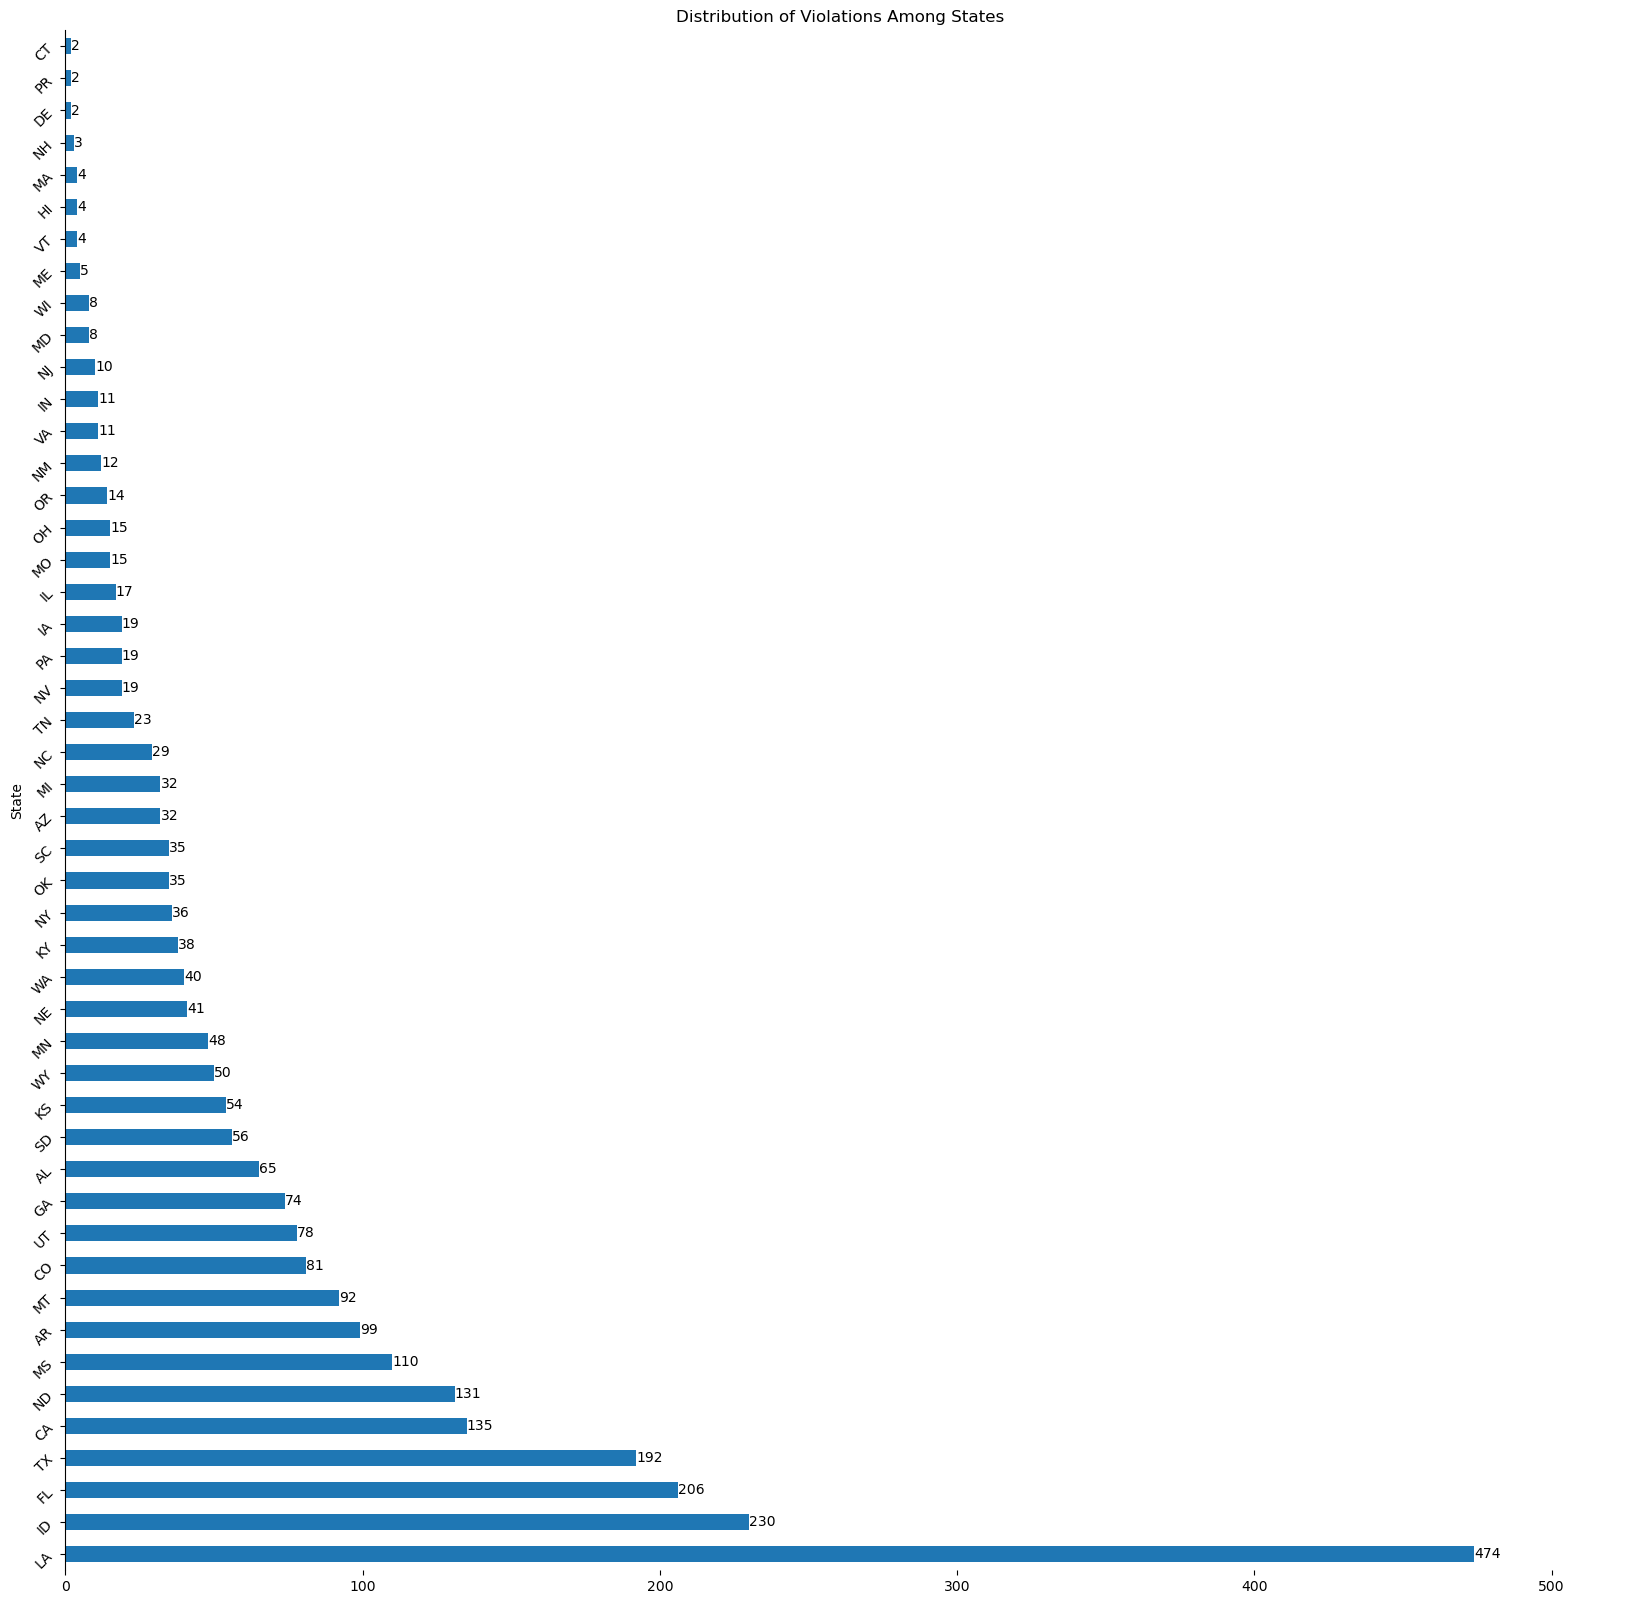

In [22]:
# Importing package:
import matplotlib.pyplot as plt

# Creating plot:
fig, ax = plt.subplots();
ax = jobs_0["EMPLOYER_STATE"].value_counts(sort = True).plot(kind='barh', 
                                                             figsize=(20, 20), 
                                                             title='Distribution of Violations Among States', 
                                                             xlabel='State', 
                                                             ylabel='Frequency', 
                                                             legend=False);

plt.yticks(rotation = 45);
ax.bar_label(ax.containers[0], label_type='edge');
ax.margins(x=0.1);
for s in ['top', 'bottom', 'right']: ax.spines[s].set_visible(False);

plt.show();


Geocoding the employer addresses in `jobs` and plotting the addresses of jobs as points overlaid on top of a map of Georgia 

<AxesSubplot:>

C:\Users\Sanha Tahir\anaconda3\envs\my-env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

C:\Users\Sanha Tahir\anaconda3\envs\my-env\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


Text(0.5, 1.0, 'Did we actually do this?')

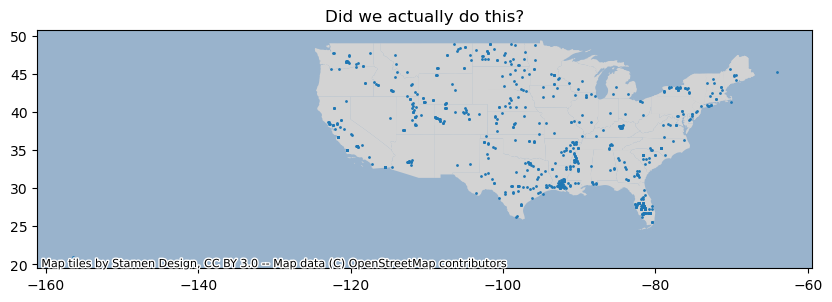

In [23]:
## I couldn't get the free version of Google API so used this as a proxy:
## However, this doesn't have many addresses so appropriate changes have been made
## Loading required packages
# import requests
# import urllib.parse

## Creating empty columns in jobs dataset
# jobs_0["Long"] = ''
# jobs_0["Lat"] = ''

## Iterating to get longitudes and latidues: 
# nmbr_of_cols = len(jobs_0.index)-1
# for i in range(nmbr_of_cols):
#      print(i)
#      address = jobs_0.at[i, 'EMPLOYER_ADDRESS_1'] + ', ' + jobs_0.at[i, 'EMPLOYER_CITY'] + ", " + jobs_0.at[i, 'EMPLOYER_STATE']
#      url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
#      response = requests.get(url).json()
#      if response == []:
#          jobs_0.at[i, 'Long'] = ''
#          jobs_0.at[i, 'Lat'] = ''
#      else:
#          jobs_0.at[i, 'Long'] = response[0]["lat"]
#          jobs_0.at[i, 'Lat'] = response[0]["lon"]

# Because this was taking a long time, I decided to download the DataFrame and then simply re-upload for further steps 
# (In case I lost progress)
filename = dirname + "\jobs_geocoded.csv"
# jobs_0.to_csv(filename)

# Reading in geocoded file: 
jobs_geocoded = pd.read_csv(filename)

# Obtaining non-empty addresses:
jobs_geocoded = jobs_geocoded[~ jobs_geocoded["Long"].isna()]

## Importing required packages:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import contextily


# Importing SHP files for US States:
file_name = dirname + '\\geopandas-tutorial\\data\\usa-states-census-2014.shp'
states = gpd.read_file(file_name)
#* states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize = (10,10))
states.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')

crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(jobs_geocoded["Lat"], jobs_geocoded["Long"])]
geo_df = gpd.GeoDataFrame(jobs_geocoded, 
                          crs = crs, 
                          geometry = geometry)

geo_df.plot(ax=ax, markersize = 1, aspect=1)

# ax.set_axis_off()
contextily.add_basemap(ax)
ax.set_title('Did we actually do this?')